SUYASH KHARE

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/Medical_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


EXPLORATORY DATA ANALYSIS

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<ipython-input-22-8d6fbdaf3ca7>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 4, i + 1)  # Adjust the subplot based on the number of features


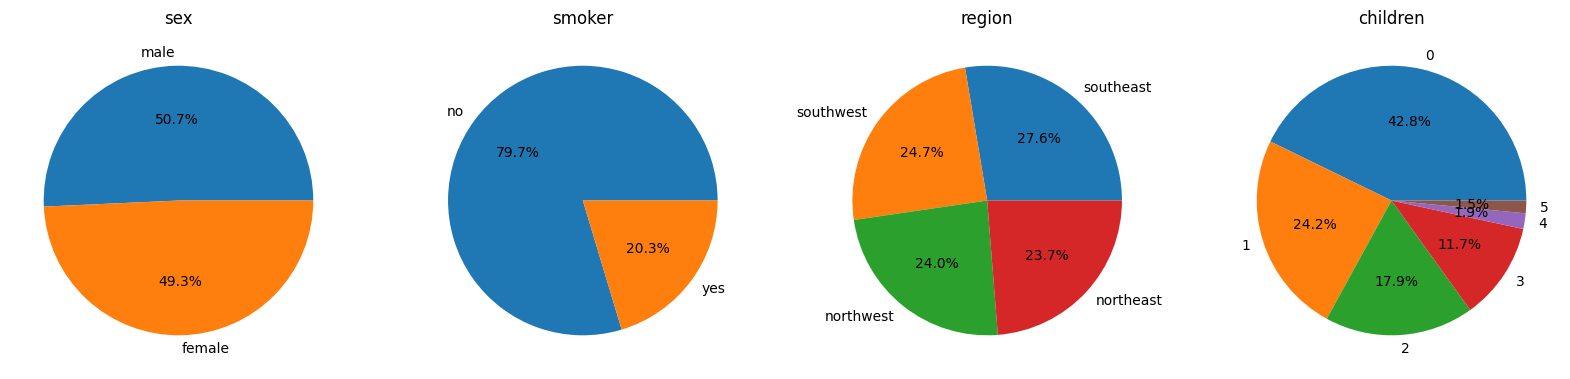

In [ ]:
features = ['sex', 'smoker', 'region', 'children']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 4, i + 1)  # Adjust the subplot based on the number of features

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
    plt.title(col)  # Set the title of each pie chart to the feature name

plt.show()

<ipython-input-23-78486f766831>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, i + 1)
<ipython-input-23-78486f766831>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df['charges'], palette=[colors[i]])
<ipython-input-23-78486f766831>:9: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=df[col], y=df['charges'], palette=[colors[i]])
<ipython-input-23-78486f766831>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df[col], y=df['charges'], 

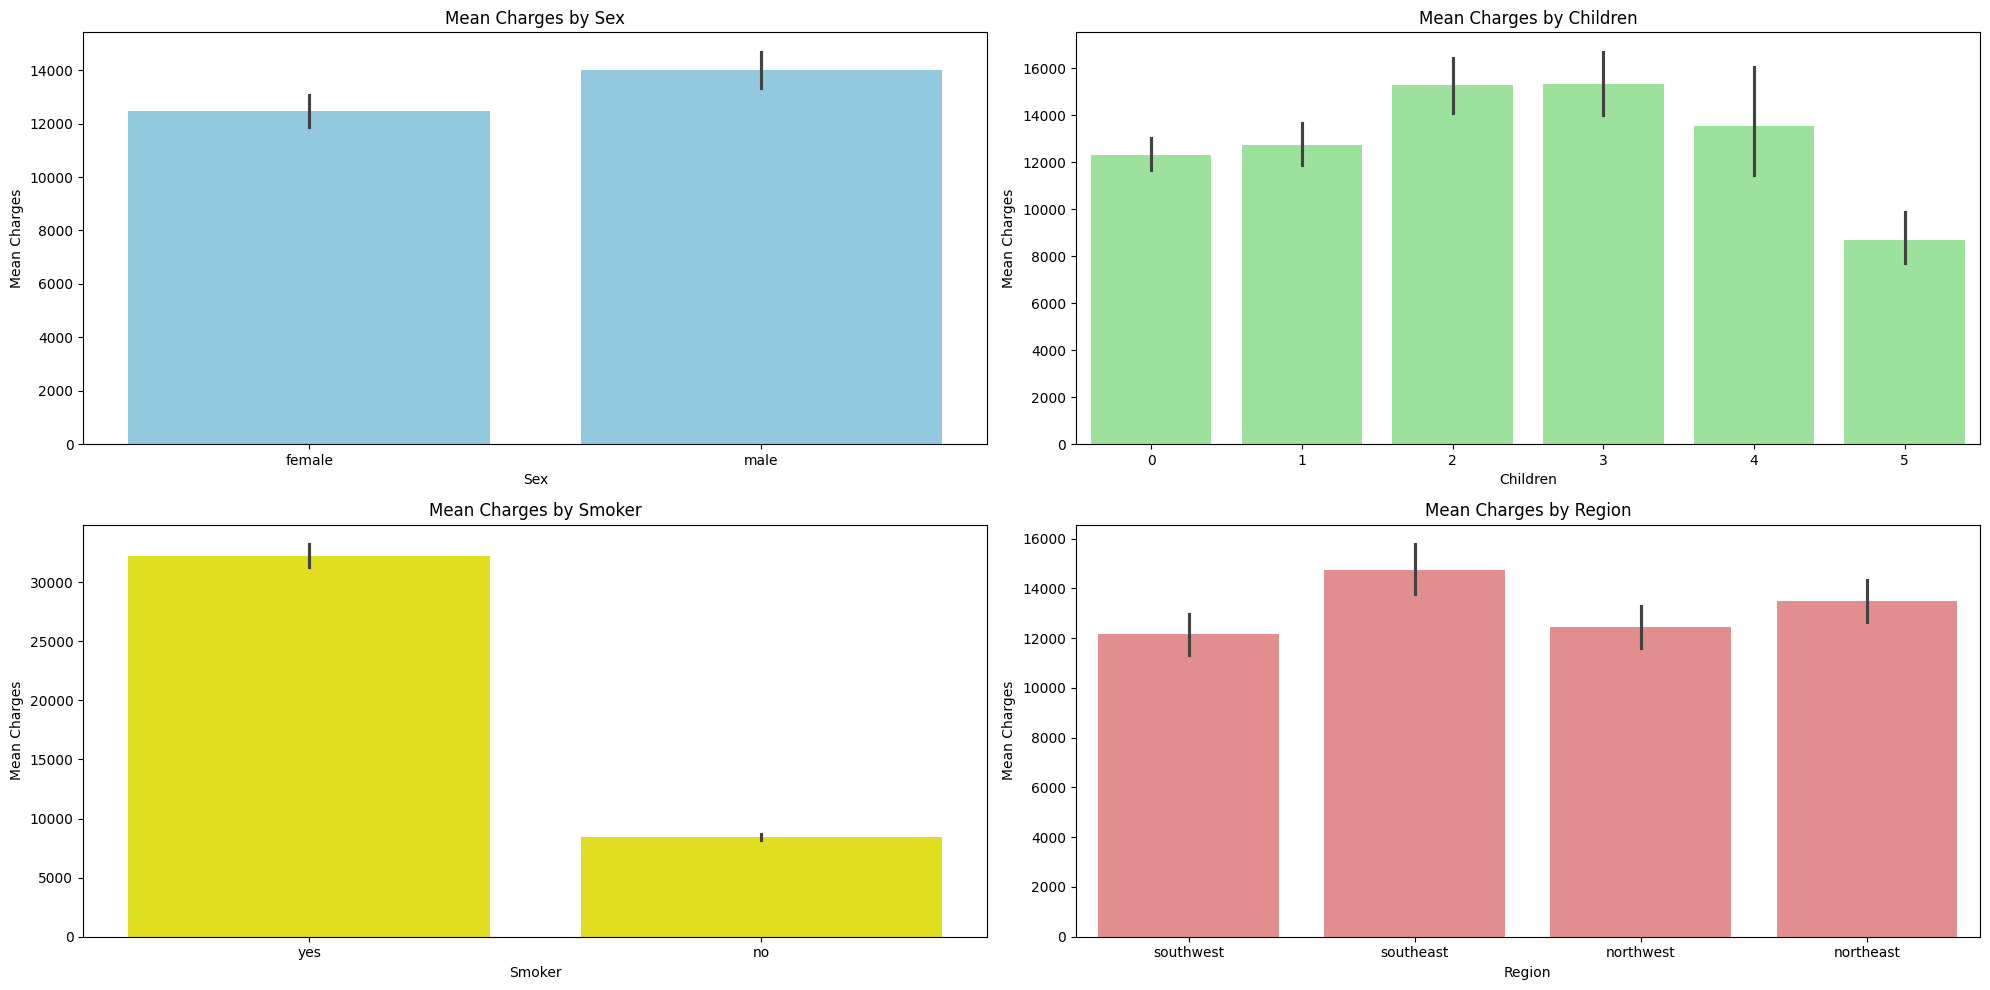

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

# Define a custom color palette with distinct colors for each feature
colors = ['skyblue', 'lightgreen', 'yellow', 'lightcoral']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=df[col], y=df['charges'], palette=[colors[i]])
    plt.title(f'Mean Charges by {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Mean Charges')
plt.tight_layout()  # Adjust subplot layout for better visualization
plt.show()

<ipython-input-24-30431d28da08>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


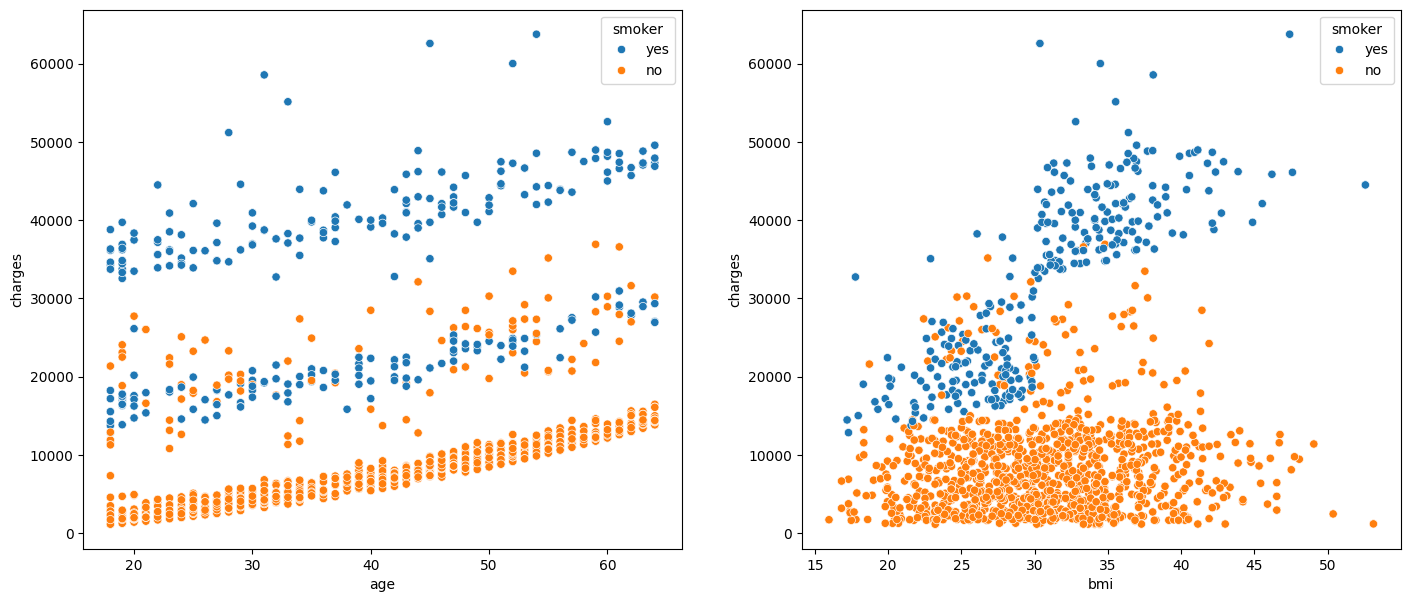

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

DATA PREPROCESSING

<Axes: ylabel='age'>

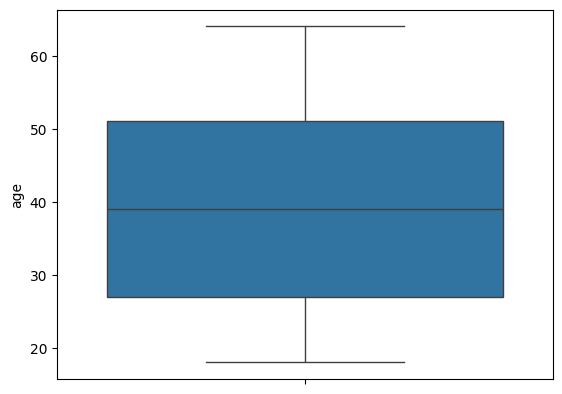

In [ ]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

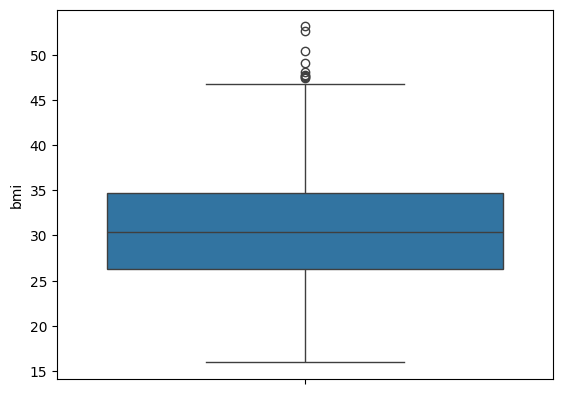

In [ ]:
sns.boxplot(df['bmi'])

In [ ]:

# Perform one-hot encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
# Display the DataFrame after encoding
print(df_encoded)

      age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0      19  27.900         0  16884.92400        True     False      False   
1      18  33.770         1   1725.55230       False      True       True   
2      28  33.000         3   4449.46200       False      True       True   
3      33  22.705         0  21984.47061       False      True       True   
4      32  28.880         0   3866.85520       False      True       True   
...   ...     ...       ...          ...         ...       ...        ...   
1333   50  30.970         3  10600.54830       False      True       True   
1334   18  31.920         0   2205.98080        True     False       True   
1335   18  36.850         0   1629.83350        True     False       True   
1336   21  25.800         0   2007.94500        True     False       True   
1337   61  29.070         0  29141.36030        True     False      False   

      smoker_yes  region_northeast  region_northwest  region_southeast  \
0

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
df_encoded = pd.DataFrame(encoder.fit_transform(df[['sex', 'smoker', 'region']]),
                          columns=encoder.get_feature_names_out(['sex', 'smoker', 'region']))
df_encoded[['age', 'bmi', 'children', 'charges']] = df[['age', 'bmi', 'children', 'charges']]


In [ ]:
# Assume df_encoded is your DataFrame with missing values
# First, fill or impute missing values in df_encoded
from sklearn.feature_selection import SelectKBest, f_regression
df_encoded_filled = df_encoded.fillna(df_encoded.mean())  # Example: filling with mean

# Feature selection using correlation metric
corr_matrix = df_encoded_filled.corr()
selected_features = SelectKBest(score_func=f_regression, k=5)
X_corr = selected_features.fit_transform(df_encoded_filled.drop(['charges'], axis=1), df_encoded_filled['charges'])

# Mask for selected features
mask = selected_features.get_support()
selected_columns = df_encoded_filled.drop(['charges'], axis=1).columns[mask]

# Split data into features (X) and target variable (y) using selected features
X = df_encoded_filled[selected_columns]
y = df_encoded_filled['charges']
feature_scores = selected_features.scores_

FEATURE SELECTION using correlation metrix

In [ ]:
print("Length of selected_columns:", len(selected_columns))
print("Length of feature_scores:", len(feature_scores))

Length of selected_columns: 5
Length of feature_scores: 11


<ipython-input-34-2238999dc507>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance Scores', y='Features', palette='viridis')


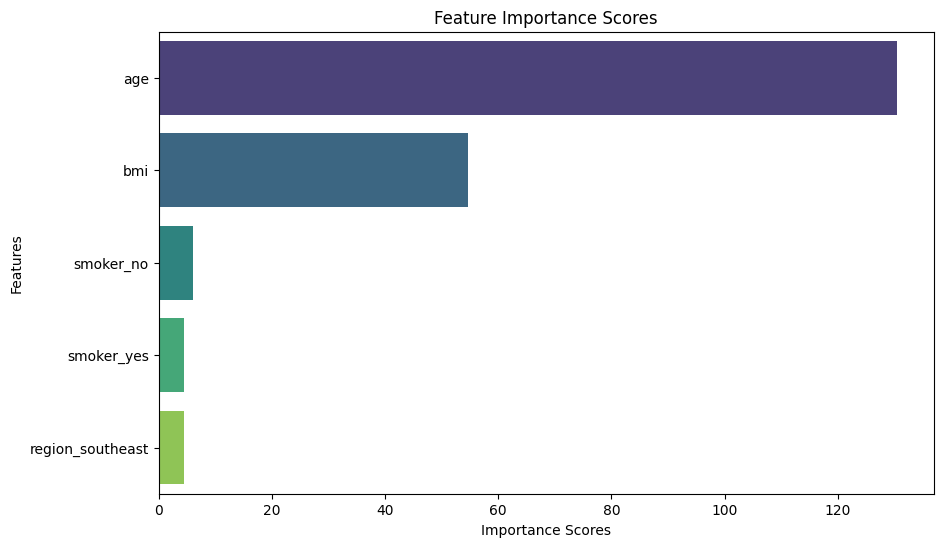

In [ ]:
# Truncate feature_scores to match the length of selected_columns
feature_scores_truncated = feature_scores[:len(selected_columns)]

# Create a DataFrame for the feature importance scores with their respective columns
feature_importance_df = pd.DataFrame({'Features': selected_columns, 'Importance Scores': feature_scores_truncated})

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df, x='Importance Scores', y='Features', palette='viridis')
plt.title('Feature Importance Scores')
plt.xlabel('Importance Scores')
plt.ylabel('Features')
plt.show()

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Scale/Normalize the data (optional but can be beneficial for some models)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL EVALUATION

Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Evaluate the model and make predictions
train_score = lr_model.score(X_train_scaled, y_train)
test_score = lr_model.score(X_test_scaled, y_test)
print("Train Score:", train_score)
print("Test Score:", test_score)

Train Score: 0.7265480861024105
Test Score: 0.8058088275718589


In [ ]:
l1 = []
l2 = []
l3 = []

for i in range(40, 50):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=41)

    lrmodel = LinearRegression()
    lrmodel.fit(xtrain, ytrain)

    # Calculate R-squared scores for training and testing sets
    train_score = lrmodel.score(xtrain, ytrain)
    test_score = lrmodel.score(xtest, ytest)

    l1.append(train_score)
    l2.append(test_score)

    # Calculate mean cross-validation score
    #cvs = np.mean(cross_val_score(lrmodel, X, Y, cv=5))
    cvs = np.mean(cross_val_score(lrmodel, X, y, cv=5))
    l3.append(cvs)

# Create a DataFrame to store the results
df1 = pd.DataFrame({'train acc': l1, 'test acc': l2, 'cvs': l3})
print(df1)

   train acc  test acc       cvs
0   0.753846  0.703572  0.744789
1   0.753846  0.703572  0.744789
2   0.753846  0.703572  0.744789
3   0.753846  0.703572  0.744789
4   0.753846  0.703572  0.744789
5   0.753846  0.703572  0.744789
6   0.753846  0.703572  0.744789
7   0.753846  0.703572  0.744789
8   0.753846  0.703572  0.744789
9   0.753846  0.703572  0.744789


In [ ]:

#xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize and train the Linear Regression model
lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)

# Print the R-squared scores for training and testing sets
print("Training R-squared Score:", lrmodel.score(xtrain, ytrain))
print("Testing R-squared Score:", lrmodel.score(xtest, ytest))

# Calculate and print the mean cross-validation score
#cv_score = cross_val_score(lrmodel, X, Y, cv=5).mean()
#print("Mean Cross-Validation Score:", cv_score)
# Calculate and print the mean cross-validation score
cv_score = cross_val_score(lrmodel, X, y, cv=5).mean()
print("Mean Cross-Validation Score:", cv_score)

Training R-squared Score: 0.7265480861024105
Testing R-squared Score: 0.8058088275718588
Mean Cross-Validation Score: 0.7447894745555365


SUPPORT VECTOR REGRESSOR

In [ ]:
from sklearn.metrics import r2_score
svrmodel = SVR()
svrmodel.fit(xtrain, ytrain.to_numpy().ravel())  # Convert ytrain to numpy array and then use .ravel()

# Predictions on training and testing sets
ypredtrain1 = svrmodel.predict(xtrain)
ypredtest1 = svrmodel.predict(xtest)

# Calculate and print the R-squared scores for training and testing sets
train_r2 = r2_score(ytrain, ypredtrain1)
test_r2 = r2_score(ytest, ypredtest1)
print("Training R-squared Score:", train_r2)
print("Testing R-squared Score:", test_r2)

# Calculate and print the mean cross-validation score
cv_score = cross_val_score(svrmodel, X, y.to_numpy().ravel(), cv=5).mean()  # Convert Y to numpy array and then use .ravel()
print("Mean Cross-Validation Score:", cv_score)

Training R-squared Score: -0.10148318562453729
Testing R-squared Score: -0.134429373643286
Mean Cross-Validation Score: -0.10369589738997438


RandomForestRegresssor

In [ ]:
# Reshape y using .ravel()
ytrain_ravel = ytrain.to_numpy().ravel()
ytest_ravel = ytest.to_numpy().ravel()

# Initialize and train the RandomForestRegressor model
rfmodel = RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain, ytrain_ravel)

# Predictions on training and testing sets
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)

# Calculate and print the R-squared scores for training and testing sets
train_r2_rf = r2_score(ytrain_ravel, ypredtrain2)
test_r2_rf = r2_score(ytest_ravel, ypredtest2)
print("Training R-squared Score:", train_r2)
print("Testing R-squared Score:", test_r2)

# Calculate and print the mean cross-validation score
cv_score_rf = cross_val_score(rfmodel, X, y.to_numpy().ravel(), cv=5).mean()
print("Mean Cross-Validation Score:", cv_score)

Training R-squared Score: -0.10148318562453729
Testing R-squared Score: -0.134429373643286
Mean Cross-Validation Score: -0.10369589738997438


Random forest regressor hyparametertunig

In [ ]:
from sklearn.model_selection import GridSearchCV

# Reshape y using .ravel()
ytrain_ravel = ytrain.to_numpy().ravel()
ytest_ravel = ytest.to_numpy().ravel()

# Define the hyperparameter grid for RandomForestRegressor
param_grid = {'n_estimators': [10, 40, 50, 98, 100, 120, 150]}

# Initialize GridSearchCV
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain_ravel)

print("Best Parameters:", grid.best_params_)

# Initialize RandomForestRegressor with best parameters
rfmodel = RandomForestRegressor(random_state=42, n_estimators=grid.best_params_['n_estimators'])
rfmodel.fit(xtrain, ytrain_ravel)

# Make predictions
ypredtrain2 = rfmodel.predict(xtrain)
ypredtest2 = rfmodel.predict(xtest)
train_r2_rf_tuned=r2_score(ytrain_ravel, ypredtrain2)
test_r2_rf_tuned=r2_score(ytest_ravel, ypredtest2)

# Print R-squared scores
print("Training R-squared Score:", r2_score(ytrain_ravel, ypredtrain2))
print("Testing R-squared Score:", r2_score(ytest_ravel, ypredtest2))

# Calculate and print the mean cross-validation score
cv_score_rf_tuned = cross_val_score(rfmodel, X, y.to_numpy().ravel(), cv=5).mean()
print("Mean Cross-Validation Score:", cv_score)

Best Parameters: {'n_estimators': 98}
Training R-squared Score: 0.9669221102684179
Testing R-squared Score: 0.8842975934624357
Mean Cross-Validation Score: -0.10369589738997438


compare result

In [ ]:
# Create an empty DataFrame with columns
results_df = pd.DataFrame(columns=['Model', 'Training R-squared', 'Testing R-squared', 'Cross-Validation Score'])

# Results for the RANDOM FOREST model
results_df.loc[0] = ['RandomForestRegressor', train_r2_rf, test_r2_rf, cv_score_rf]

# Results for the tuned RANDOM FOREST model
results_df.loc[1] = ['Tuned RandomForestRegressor', train_r2_rf_tuned, test_r2_rf_tuned, cv_score_rf_tuned]

print(results_df)

                         Model  Training R-squared  Testing R-squared  \
0        RandomForestRegressor            0.967036           0.883817   
1  Tuned RandomForestRegressor            0.966922           0.884298   

   Cross-Validation Score  
0                0.813823  
1                0.813510  


In [ ]:
# Create the results data frame with custom precision
results_df = pd.DataFrame({
    'Model': ['RandomForestRegressor', 'Tuned RandomForestRegressor'],
    'Training R-squared': [train_r2_rf, train_r2_rf_tuned],
    'Testing R-squared': [test_r2_rf, test_r2_rf_tuned],
    'Cross-Validation Score': [cv_score_rf, cv_score_rf_tuned]
}, index=['0', '1'])  # Assigning custom indices for clarity

# Display the DataFrame with 6 decimal places
pd.options.display.precision = 6
print(results_df)

                         Model  Training R-squared  Testing R-squared  \
0        RandomForestRegressor            0.967036           0.883817   
1  Tuned RandomForestRegressor            0.966922           0.884298   

   Cross-Validation Score  
0                0.813823  
1                0.813510  


GradientBoostingRegressor

In [ ]:
# Reshape y using .ravel()
ytrain_ravel = ytrain.to_numpy().ravel()
ytest_ravel = ytest.to_numpy().ravel()

# Initialize and train the GradientBoostingRegressor model
gbmodel = GradientBoostingRegressor()
gbmodel.fit(xtrain, ytrain_ravel)

# Predictions on training and testing sets
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)

# Calculate and print the R-squared scores for training and testing sets
train_r2 = r2_score(ytrain_ravel, ypredtrain3)
test_r2 = r2_score(ytest_ravel, ypredtest3)
print("Training R-squared Score:", train_r2)
print("Testing R-squared Score:", test_r2)

# Calculate and print the mean cross-validation score
cv_score = cross_val_score(gbmodel, X, y.to_numpy().ravel(), cv=5).mean()
print("Mean Cross-Validation Score:", cv_score)

Training R-squared Score: 0.8858939392962294
Testing R-squared Score: 0.9027581460209166
Mean Cross-Validation Score: 0.8497308210988779


Gradient Boosting Regressor hyarametertunig

In [ ]:
# Reshape y using .ravel()
ytrain_ravel = ytrain.to_numpy().ravel()
ytest_ravel = ytest.to_numpy().ravel()

# Define the hyperparameter grid for GradientBoostingRegressor
param_grid = {'n_estimators': [10, 15, 19, 20, 21, 50], 'learning_rate': [0.1, 0.19, 0.2, 0.21, 0.8, 1]}

# Initialize GridSearchCV
grid = GridSearchCV(GradientBoostingRegressor(), param_grid, scoring="r2", cv=5)
grid.fit(xtrain, ytrain_ravel)

print("Best Parameters:", grid.best_params_)

# Initialize GradientBoostingRegressor with best parameters
gbmodel = GradientBoostingRegressor(n_estimators=grid.best_params_['n_estimators'], learning_rate=grid.best_params_['learning_rate'])
gbmodel.fit(xtrain, ytrain_ravel)

# Make predictions
ypredtrain3 = gbmodel.predict(xtrain)
ypredtest3 = gbmodel.predict(xtest)
train_r2_tuned=r2_score(ytrain_ravel, ypredtrain3)
test_r2_tuned=r2_score(ytest_ravel, ypredtest3)

# Print R-squared scores
print("Training R-squared Score:", r2_score(ytrain_ravel, ypredtrain3))
print("Testing R-squared Score:", r2_score(ytest_ravel, ypredtest3))

# Calculate and print the mean cross-validation score
cv_score_tuned = cross_val_score(gbmodel, X, y.to_numpy().ravel(), cv=5).mean()
print("Mean Cross-Validation Score:", cv_score)

Best Parameters: {'learning_rate': 0.2, 'n_estimators': 15}
Training R-squared Score: 0.8565521706836672
Testing R-squared Score: 0.8986334173863899
Mean Cross-Validation Score: 0.8497308210988779


compare results

In [ ]:

results_df_gb = pd.DataFrame(columns=['Model', 'Training R-squared', 'Testing R-squared', 'Cross-Validation Score'])

# Results for the Gradient Boosting Regressor
results_df_gb.loc[0] = ['Gradient Boosting', train_r2, test_r2, cv_score]

# Results for the Tuned Gradient Boosting Regressor
results_df_gb.loc[1] = ['Tuned Gradient Boosting', train_r2_tuned, test_r2_tuned, cv_score_tuned]

print(results_df_gb)

                     Model  Training R-squared  Testing R-squared  \
0        Gradient Boosting            0.885894           0.902758   
1  Tuned Gradient Boosting            0.856552           0.898633   

   Cross-Validation Score  
0                0.849731  
1                0.855746  


 KNeighboursRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(xtrain, ytrain_ravel)

# Predictions on training and testing sets
ypredtrain_knn = knn_model.predict(xtrain)
ypredtest_knn = knn_model.predict(xtest)

# Calculate and print the R-squared scores for training and testing sets using KNN
train_r2_knn = r2_score(ytrain_ravel, ypredtrain_knn)
test_r2_knn = r2_score(ytest_ravel, ypredtest_knn)
print("Training R-squared Score (KNN):", train_r2_knn)
print("Testing R-squared Score (KNN):", test_r2_knn)

# Calculate and print the mean cross-validation score using KNN
cv_score_knn = cross_val_score(knn_model, X, y.to_numpy().ravel(), cv=5).mean()
print("Mean Cross-Validation Score (KNN):", cv_score_knn)


Training R-squared Score (KNN): 0.5857401068164627
Testing R-squared Score (KNN): 0.29483538794304676
Mean Cross-Validation Score (KNN): 0.3404068119605732


KNeighbour Regressor hyparametertunig

In [ ]:

# Initialize and train the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(xtrain, ytrain_ravel)

# Predictions on training and testing sets
ypredtrain_knn = knn_model.predict(xtrain)
ypredtest_knn = knn_model.predict(xtest)

# Calculate and print the R-squared scores for training and testing sets using KNN
train_r2_knn = r2_score(ytrain_ravel, ypredtrain_knn)
test_r2_knn = r2_score(ytest_ravel, ypredtest_knn)# Define the hyperparameter grid for KNeighborsRegressor
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# Initialize GridSearchCV for KNeighborsRegressor
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, scoring="r2", cv=5)
grid_knn.fit(xtrain, ytrain_ravel)

print("Best Parameters for KNN:", grid_knn.best_params_)

# Initialize KNeighborsRegressor with best parameters
knn_model_tuned = KNeighborsRegressor(n_neighbors=grid_knn.best_params_['n_neighbors'],
                                       weights=grid_knn.best_params_['weights'],
                                       p=grid_knn.best_params_['p'])
knn_model_tuned.fit(xtrain, ytrain_ravel)

# Predictions on training and testing sets using tuned KNN model
ypredtrain_knn_tuned = knn_model_tuned.predict(xtrain)
ypredtest_knn_tuned = knn_model_tuned.predict(xtest)

# Calculate and print the R-squared scores for training and testing sets using tuned KNN
train_r2_knn_tuned = r2_score(ytrain_ravel, ypredtrain_knn_tuned)
test_r2_knn_tuned = r2_score(ytest_ravel, ypredtest_knn_tuned)
print("Training R-squared Score (Tuned KNN):", train_r2_knn_tuned)
print("Testing R-squared Score (Tuned KNN):", test_r2_knn_tuned)


Best Parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Training R-squared Score (Tuned KNN): 0.9966654826587569
Testing R-squared Score (Tuned KNN): 0.6391120430798947


compare results

In [ ]:
# Create an empty DataFrame with columns
results_df = pd.DataFrame(columns=['Model', 'Training R-squared', 'Testing R-squared', 'Cross-Validation Score'])

# Results for the KNN model
results_df.loc[len(results_df)] = ['KNN', train_r2_knn, test_r2_knn, cv_score_knn]

# Results for the tuned KNN model
results_df.loc[len(results_df)] = ['Tuned KNN', train_r2_knn_tuned, test_r2_knn_tuned, grid_knn.best_score_]

print(results_df)

       Model  Training R-squared  Testing R-squared  Cross-Validation Score
0        KNN            0.585740           0.294835                0.340407
1  Tuned KNN            0.996665           0.639112                0.566894


comparsion of KNN & GRADIENT BOOSTING && RANDOM FOREST

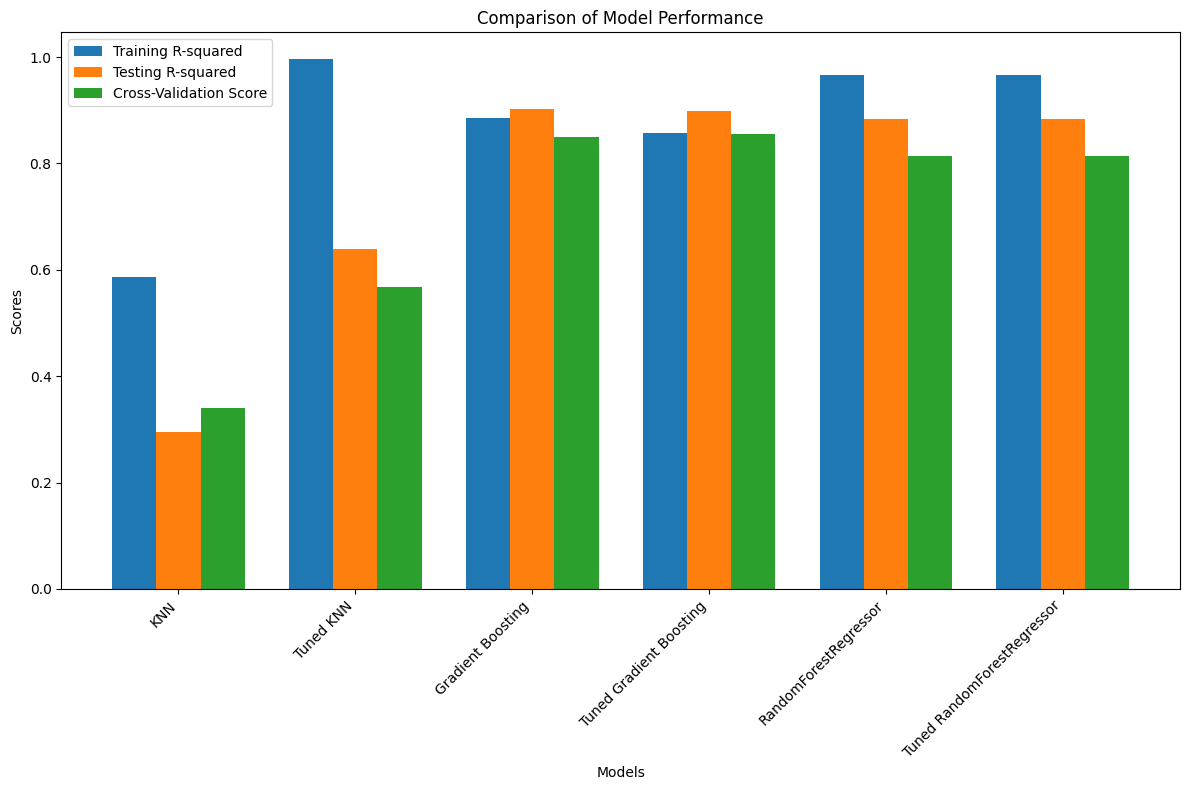

In [ ]:
# Data for plotting
models = ['KNN', 'Tuned KNN', 'Gradient Boosting', 'Tuned Gradient Boosting', 'RandomForestRegressor', 'Tuned RandomForestRegressor']
train_r2_scores = [train_r2_knn, train_r2_knn_tuned, train_r2, train_r2_tuned, train_r2_rf, train_r2_rf_tuned]
test_r2_scores = [test_r2_knn, test_r2_knn_tuned, test_r2, test_r2_tuned, test_r2_rf, test_r2_rf_tuned]
cv_scores = [cv_score_knn, grid_knn.best_score_, cv_score, cv_score_tuned, cv_score_rf, cv_score_rf_tuned]

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 8))
index = range(len(models))
bar_width = 0.25

train_bars = ax.bar(index, train_r2_scores, bar_width, label='Training R-squared')
test_bars = ax.bar([p + bar_width for p in index], test_r2_scores, bar_width, label='Testing R-squared')
cv_bars = ax.bar([p + bar_width * 2 for p in index], cv_scores, bar_width, label='Cross-Validation Score')

# Add labels, title, and legend
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(models, rotation=45, ha='right')
ax.legend()

# Show plot
plt.tight_layout()
plt.show()